In [11]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [1]:
from __future__ import print_function
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob

In [79]:
!ls ../tfhub/inference

inception_v3  mobilenet_v1_025_128  mobilenet_v2_100_128  nasnet_mobile


In [2]:
mask_list = glob.glob('../data/wsi_annotation/*png')
mask_paths = pd.DataFrame(mask_list, index=[os.path.basename(x).replace('.png', '') for x in mask_list])
mask_paths

,0
1305474,../data/wsi_annotation/1305474.png
1304700,../data/wsi_annotation/1304700.png
1304730,../data/wsi_annotation/1304730.png
1305459,../data/wsi_annotation/1305459.png
1305495,../data/wsi_annotation/1305495.png
1305445,../data/wsi_annotation/1305445.png
1305453,../data/wsi_annotation/1305453.png
1304711,../data/wsi_annotation/1304711.png
1305450,../data/wsi_annotation/1305450.png
1305481,../data/wsi_annotation/1305481.png


25
../tfhub/inference/inception_v3/1304704_prob.npy 1304704
(92, 103) [  0 255]
argmax: [0 1 2 3 4 6]
mask: [0 1 2 3 4 6]


Text(0.5,1.05,'Mask')

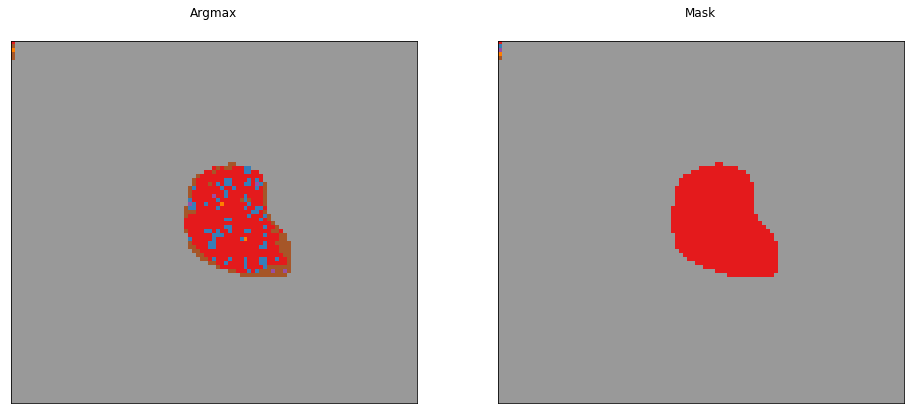

In [16]:
inf_list = glob.glob('../tfhub/inference/inception_v3/*npy')
print(len(inf_list))

inf_path = np.random.choice(inf_list,1)[0]
inf_base = os.path.basename(inf_path).replace('_prob.npy', '')
print(inf_path, inf_base)

x = np.load(inf_path)
mask = cv2.imread(mask_paths.loc[inf_base,0], -1)
x_, y_ = x.shape[:2]
mask = cv2.resize(mask, dsize=(y_, x_), interpolation=cv2.INTER_NEAREST)
print(mask.shape, np.unique(mask))
mask[0:5, 0] = np.arange(5)

fig, axs = plt.subplots(1,2,figsize=(16, 8))
# for idx in range(5):
#     axs[idx].matshow(x[:,:,idx], cmap='jet')
#     axs[idx].set_yticks([])
#     axs[idx].set_xticks([])
#     axs[idx].set_title('{}'.format(idx))
    
amax = np.argmax(x, axis=-1)
amax[mask==255] = 6
mask[mask==255] = 6
print('argmax:', np.unique(amax))
print('mask:', np.unique(mask))
axs[-2].matshow(amax, cmap='Set1')
axs[-2].set_yticks([])
axs[-2].set_xticks([])
axs[-2].set_title('Argmax')

axs[-1].matshow(mask, cmap='Set1')
axs[-1].set_yticks([])
axs[-1].set_xticks([])
axs[-1].set_title('Mask')

In [25]:
inf_list = glob.glob('../tfhub/inference/inception_v3/*npy')
print(len(inf_list))

for inf_path in inf_list:
    inf_base = os.path.basename(inf_path).replace('_prob.npy', '')
    print(inf_path, inf_base)

    x = np.load(inf_path)
    mask = cv2.imread(mask_paths.loc[inf_base,0], -1)
    x_, y_ = x.shape[:2]
    mask = cv2.resize(mask, dsize=(y_, x_), interpolation=cv2.INTER_NEAREST)

    amax = np.argmax(x, axis=-1)
    amax[mask==255] = 255

    ## pull out annotated area
    amax_annotated = amax[mask != 255]
    mask_annotated = mask[mask != 255]
    total_size = float(amax_annotated.shape[0])
    
    ## pull out non-stroma
    mask_annotated = mask_annotated[amax_annotated != 4]
    amax_annotated = amax_annotated[amax_annotated != 4]

    total_acc = (amax_annotated == mask_annotated).sum() / total_size
    epithelium_acc = (amax_annotated == mask_annotated).sum() / float(amax_annotated.shape[0])
    print('\t', total_acc)
    print('\t', epithelium_acc, end='\n\n')

29
../tfhub/inference/inception_v3/1305449_prob.npy 1305449
	 0.4106614017769003
	 0.5971291866028708

../tfhub/inference/inception_v3/1304700_prob.npy 1304700
	 0.3686894441611423
	 0.4573055028462998

../tfhub/inference/inception_v3/1304706_prob.npy 1304706
	 0.45988538681948427
	 0.6524390243902439

../tfhub/inference/inception_v3/1304704_prob.npy 1304704
	 0.7
	 0.8285714285714286

../tfhub/inference/inception_v3/1305496_prob.npy 1305496
	 0.02132998745294856
	 0.03177570093457944

../tfhub/inference/inception_v3/1304702_prob.npy 1304702
	 0.5910652920962199
	 0.6963562753036437

../tfhub/inference/inception_v3/1305487_prob.npy 1305487
	 0.05532170775706555
	 0.10697674418604651

../tfhub/inference/inception_v3/1304713_prob.npy 1304713
	 0.3516483516483517
	 0.8421052631578947

../tfhub/inference/inception_v3/1304725_prob.npy 1304725
	 0.6565217391304348
	 0.8435754189944135

../tfhub/inference/inception_v3/1305483_prob.npy 1305483
	 0.018556701030927835
	 0.033707865168539325

../